# Visualizaciones

In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
#pip install openpyxl
pd.set_option('display.max_columns', None)

In [384]:
df_merged = pd.read_csv('merged_viz.csv') 

## Análisis delta

💡Estadísticas principales💡: 

- Mediana = 24.32 % ➡️ línea dentro del recuadro
- Q1 (25%) = -2.68 % ➡️ borde inferior de la Caja
- Q3 (75%) = 92.32 % ➡️ borde superior de la Caja

Rango Intercuartílico (entre Q1 y Q3): 95.0
--------------------------------------------------
- Bigotes de la caja: valores máximos (bigote de arriba) y mínimos (abajo) excluyendo outliers (valores atípicos 🫧 = burbujas )
    + Bigote de arriba = 234.82
    + Bigote de abajo = -145.18
        - Los bigotes se extienden 1,5 veces por encima y por debajo de Q3 y Q1, respectivamente.
        - Por ello, habrá que estudiar los outliers tomando como inicio el dato de los bigotes.


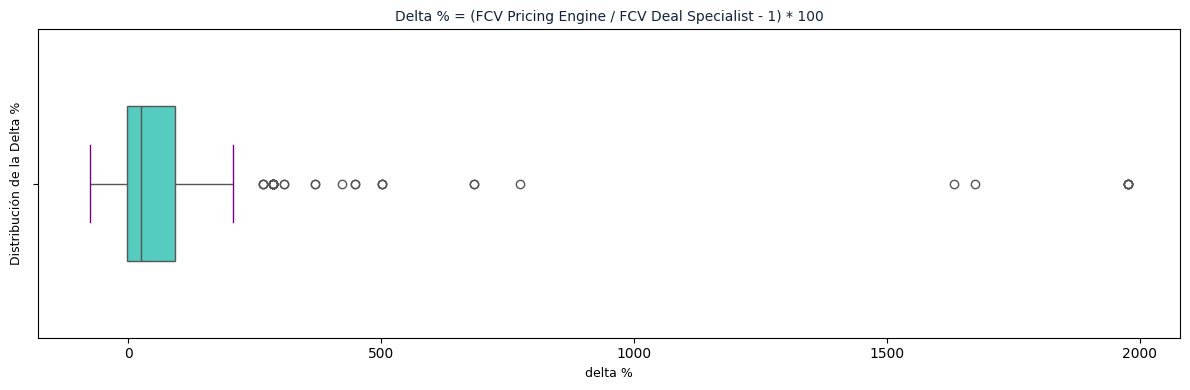

In [385]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = "delta PE vs DS", 
            data = df_merged, 
            width = 0.5, 
            color = "turquoise",
            capprops={'color':'purple'}) # para cambiar el color de los bigotes)

# cambiamos el nombre de los ejes usando los métodos
plt.title('Delta % = (FCV Pricing Engine / FCV Deal Specialist - 1) * 100', fontsize = 10, color= '#14213d');
plt.ylabel("Distribución de la Delta %", fontsize = 9)
plt.xlabel("delta %",  fontsize = 9)

q1 = round(np.quantile(df_merged['delta PE vs DS'], 0.25), 2)
q3 = round(np.quantile(df_merged['delta PE vs DS'], 0.75), 2)
ric = q3 - q1
limite_inferior = q1 - 1.5 * ric
limite_superior = q3 + 1.5 * ric

#Prints:
print("💡Estadísticas principales💡: \n")
print(f"- Mediana = {round(df_merged['delta PE vs DS'].median(),2)} % ➡️ línea dentro del recuadro")
print(f"- Q1 (25%) = {q1} % ➡️ borde inferior de la Caja" )
print(f"- Q3 (75%) = {q3} % ➡️ borde superior de la Caja\n" )
print(f"Rango Intercuartílico (entre Q1 y Q3): {ric}")
print('-'* 50)
print(f"- Bigotes de la caja: valores máximos (bigote de arriba) y mínimos (abajo) excluyendo outliers (valores atípicos 🫧 = burbujas )")
print(f"    + Bigote de arriba = {limite_superior}")
print(f"    + Bigote de abajo = {limite_inferior}")
print(f"        - Los bigotes se extienden 1,5 veces por encima y por debajo de Q3 y Q1, respectivamente.")
print(f"        - Por ello, habrá que estudiar los outliers tomando como inicio el dato de los bigotes.")

# Ajustar el espaciado entre subplots
plt.tight_layout();

In [386]:
df_visualizaciones_outliers = df_merged[(df_merged['delta PE vs DS'] >= limite_superior) | (df_merged['delta PE vs DS'] <= limite_inferior)]
df_visualizaciones_sin_outliers = df_merged[(df_merged['delta PE vs DS'] <= limite_superior) & (df_merged['delta PE vs DS'] >= limite_inferior)]

🚨 OUTLIERS = Valores que quedan fuera de los bigotes
    🔍 Datos en intervalo SUPERIOR (234.82, 1976.61): 36 cotizaciones
    🔍 Datos en intervalo INFERIOR (-145.18, -75.2): 0 cotizaciones


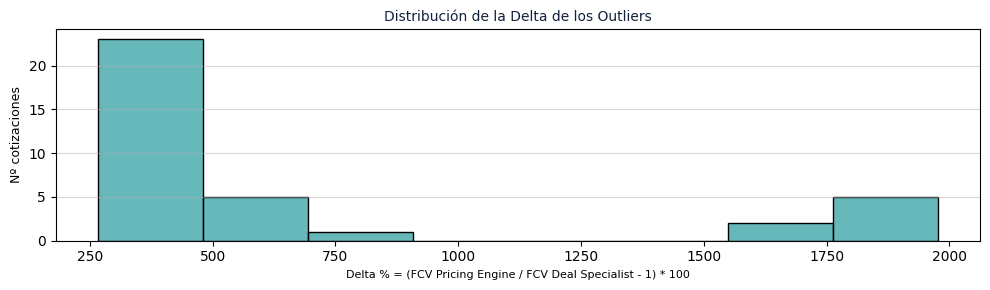

In [387]:
plt.figure(figsize=(10, 3))

plt.title('Distribución de la Delta de los Outliers', fontsize = 10, color= '#14213d')
plt.xlabel("Delta % = (FCV Pricing Engine / FCV Deal Specialist - 1) * 100", fontsize = 8)
plt.ylabel("Nº cotizaciones",  fontsize = 9)
plt.grid(axis='y', alpha=0.5) #el alpha mide la transparencia del grid

sns.histplot(x = "delta PE vs DS", 
            data = df_visualizaciones_outliers,
            bins = 'auto',
            color = '#34a0a4')

print("🚨 OUTLIERS = Valores que quedan fuera de los bigotes")
print(f"    🔍 Datos en intervalo SUPERIOR ({limite_superior}, {round(df_merged['delta PE vs DS'].max(),2)}): {df_merged[(df_merged['delta PE vs DS'] >= limite_superior)].shape[0]} cotizaciones")    
print(f"    🔍 Datos en intervalo INFERIOR ({limite_inferior}, {round(df_merged['delta PE vs DS'].min(),2)}): {df_merged[(df_merged['delta PE vs DS'] <= limite_inferior)].shape[0]} cotizaciones")

# Ajustar el espaciado entre subplots
plt.tight_layout();

## 1. Datos sin distorsiones VS Outliers

❓❓❓¿En qué tipo de servicio está el Outlier?❓❓❓
- LOT: ['Internet Bk' 'Internet Ppal' 'MPLS']
- Commercial Model: ['B4B' 'DIA' 'MPLS']


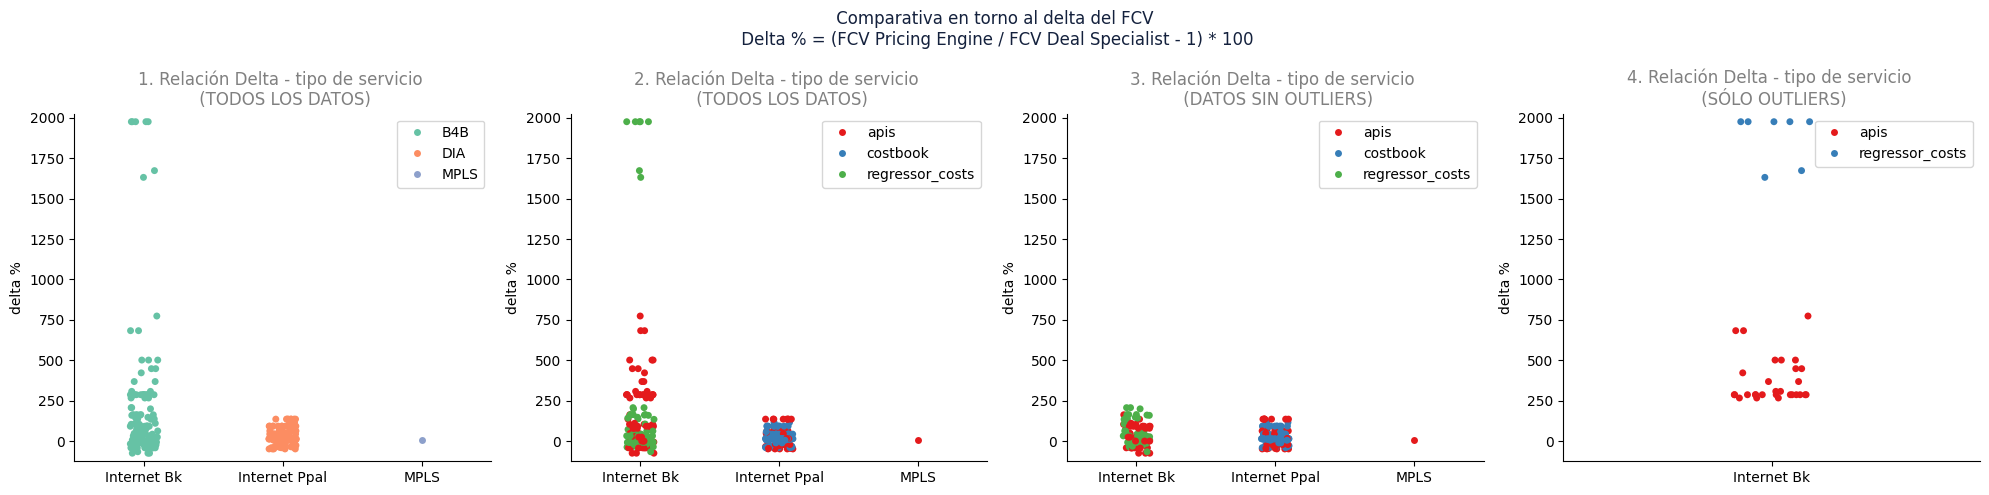

In [388]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))

print("❓❓❓¿En qué tipo de servicio está el Outlier?❓❓❓")
print(f"- LOT: {df_merged['Lot_pe'].unique()}")
print(f"- Commercial Model: {df_merged['Commercial_Model_req'].unique()}")

# título al conjunto de todas las gráficas
plt.suptitle(" Comparativa en torno al delta del FCV \n Delta % = (FCV Pricing Engine / FCV Deal Specialist - 1) * 100", fontsize = 12, color = '#14213d')

#PLOT 1: Todos los datos sin leyenda
sns.stripplot(x = "Lot_pe",
            y = "delta PE vs DS", 
            hue = 'Commercial_Model_req',
            palette = 'Set2',
            data = df_merged,
            ax = axes[0])

axes[0].set_title(f"1. Relación Delta - tipo de servicio \n (TODOS LOS DATOS)", color= 'grey')
axes[0].set_xlabel("")
axes[0].set_ylabel("delta %")
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].get_legend().set_title('')

#PLOT 2: Todos los datos
sns.stripplot(x = "Lot_pe",
            y = "delta PE vs DS", 
            data = df_merged,
            hue = 'main_access_mrc_amt_quoted_by_pe',
            palette = 'Set1',
            ax = axes[1])

axes[1].set_title(f"2. Relación Delta - tipo de servicio \n (TODOS LOS DATOS)", color= 'grey')
axes[1].set_xlabel("")
axes[1].set_ylabel("delta %")
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].get_legend().set_title('')

#PLOT 3: sólo datos sin distorsiones
sns.stripplot(x = "Lot_pe",
            y = "delta PE vs DS", 
            data = df_visualizaciones_sin_outliers,
            hue = 'main_access_mrc_amt_quoted_by_pe',
            palette = 'Set1',
            ax = axes[2])

axes[2].set_title(f"3. Relación Delta - tipo de servicio \n (DATOS SIN OUTLIERS)", color= 'grey')
axes[2].set_xlabel("")
axes[2].set_ylabel("delta %")
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].get_legend().set_title('')


#PLOT 4: sólo Outliers
sns.stripplot(x = "Lot_pe",
            y = "delta PE vs DS", 
            data = df_visualizaciones_outliers,
            hue = 'main_access_mrc_amt_quoted_by_pe',
            palette = 'Set1',
            ax = axes[3])

axes[3].set_title(f"4. Relación Delta - tipo de servicio \n (SÓLO OUTLIERS)", color= 'grey')
axes[3].set_xlabel("")
axes[3].set_ylabel("delta %")
axes[3].spines['right'].set_visible(False)
axes[3].spines['top'].set_visible(False)
axes[3].get_legend().set_title('')


#Todos los ejes "y" han de tener la misma escala:
minimo = df_merged['delta PE vs DS'].min()
maximo = df_merged['delta PE vs DS'].max()
axes[0].set_ylim(minimo - 50, maximo + 50) 
axes[1].set_ylim(minimo - 50, maximo + 50) 
axes[2].set_ylim(minimo - 50, maximo + 50)
axes[3].set_ylim(minimo - 50, maximo + 50)

# Ajustar el espaciado entre subplots
plt.tight_layout();

`Nota para Antonio`: 
- qué significa "lot" como tal?
- ¿todos los B4B se usan para back up? Por eliminar esta primera visualización. Yo pensaba que los B4B podían ser tanto para principal como para back up. 
- Entiendo, por el precio, que nunca van a usar un DIA para back up

## 2. DELTA: outliers

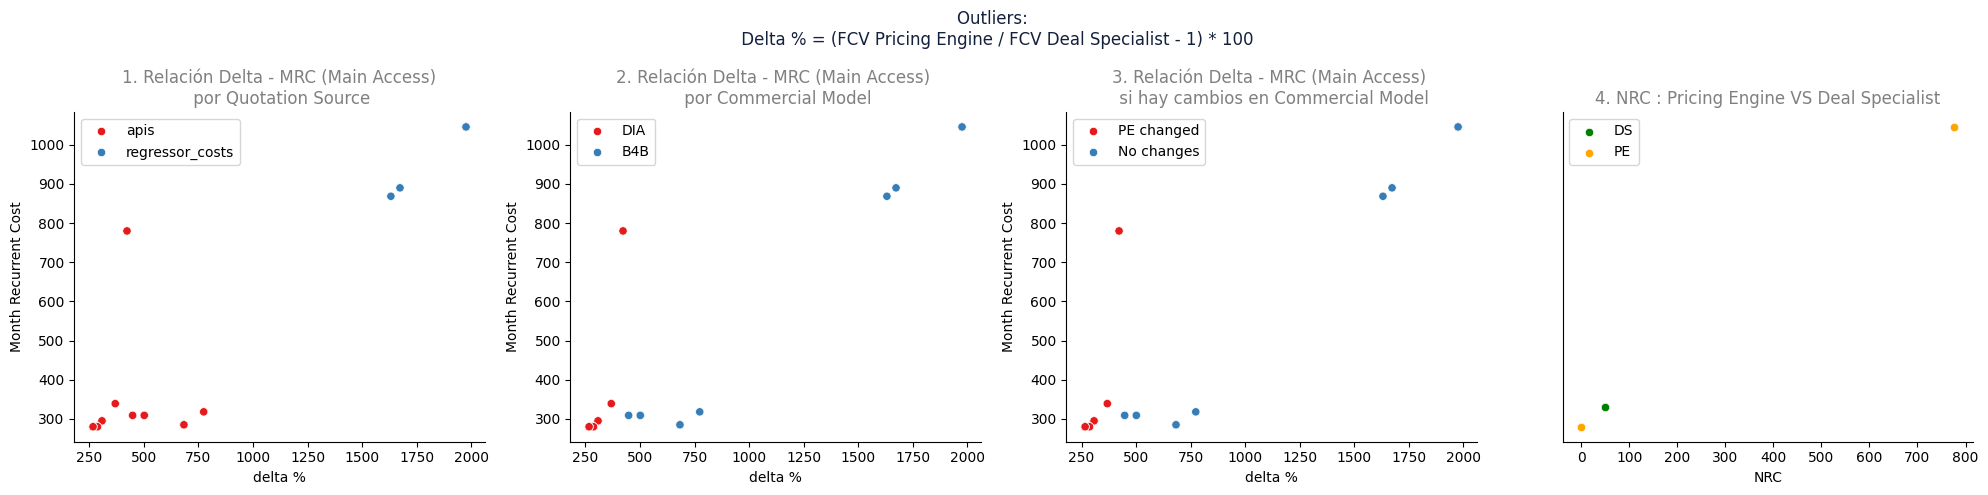

In [389]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))

# título al conjunto de todas las gráficas
plt.suptitle("Outliers: \n Delta % = (FCV Pricing Engine / FCV Deal Specialist - 1) * 100", fontsize = 12, color = '#14213d')

#Plot 1: Relación entre el Delta y el Main Access MRC (Pricing Engine) BY QUOTATION SOURCE. 
sns.scatterplot(x = "delta PE vs DS", 
            y = "Main_Access_MRC_pe",
            hue = "main_access_mrc_amt_quoted_by_pe",
            data = df_visualizaciones_outliers,
            palette = 'Set1',
            ax = axes[0])
axes[0].set_title(f'1. Relación Delta - MRC (Main Access)\n por Quotation Source', color= 'grey')
axes[0].set_ylabel("Month Recurrent Cost")
axes[0].set_xlabel("delta %")
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].get_legend().set_title('')

#Plot 2: Relación entre el Delta y el Main Access MRC (Pricing Engine). 
sns.scatterplot(x = "delta PE vs DS", 
            y = "Main_Access_MRC_pe",
            hue = "Commercial_Model_pe",
            data = df_visualizaciones_outliers,
            palette = 'Set1',
            ax = axes[1])
axes[1].set_title(f'2. Relación Delta - MRC (Main Access) \n por Commercial Model', color= 'grey')
axes[1].set_ylabel("Month Recurrent Cost")
axes[1].set_xlabel("delta %")
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].get_legend().set_title('')


#Plot 3: Relación entre el Delta y el Main Access MRC (Pricing Engine). 
sns.scatterplot(x = "delta PE vs DS", 
            y = "Main_Access_MRC_pe",
            hue = "Commercial_model_changes",
            data = df_visualizaciones_outliers,
            palette = 'Set1',
            ax = axes[2])
axes[2].set_title(f'3. Relación Delta - MRC (Main Access) \n si hay cambios en Commercial Model', color= 'grey')
axes[2].set_ylabel("Month Recurrent Cost")
axes[2].set_xlabel("delta %")
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].get_legend().set_title('')


#Plot 4: Relación entre el Delta y el Main Access NRC (Pricing Engine). 
sns.scatterplot(x = "Main_Access_NRC_ds", 
                y = "Main_Access_NRC_ds", 
            data = df_visualizaciones_outliers,
            color= 'green',
            ax = axes[3], label = 'DS')

sns.scatterplot(x = "Main_Access_NRC_pe", 
                y = "Main_Access_NRC_pe",
            data = df_visualizaciones_outliers,
            color= 'orange',
            ax = axes[3],label = 'PE')

axes[3].set_title(f"4. NRC : Pricing Engine VS Deal Specialist", color= 'grey')
axes[3].set_ylabel("NRC")
axes[3].set_xlabel("NRC")
axes[3].get_yaxis().set_visible(False)
axes[3].spines['right'].set_visible(False)
axes[3].spines['top'].set_visible(False)

# Ajustar el espaciado entre subplots
plt.tight_layout();

## 3. DELTA: datos sin distorsiones

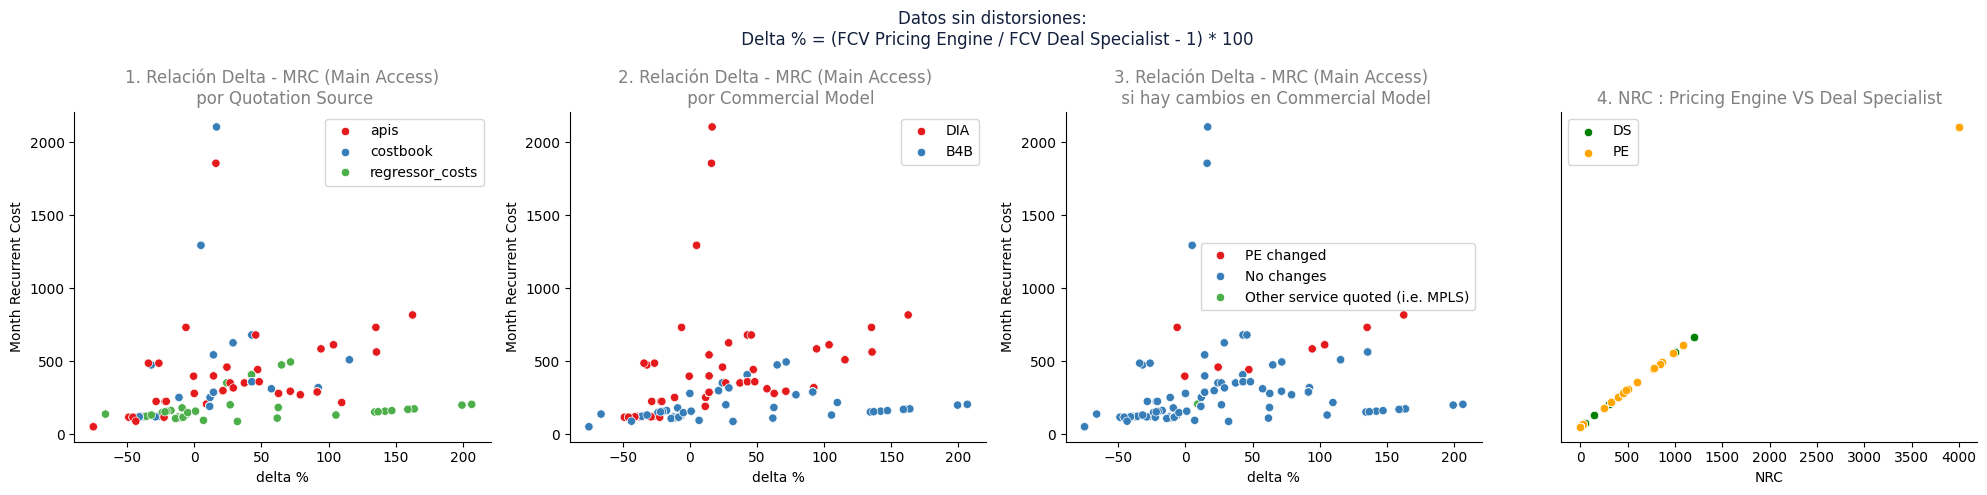

In [390]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))

# título al conjunto de todas las gráficas
plt.suptitle("Datos sin distorsiones: \n Delta % = (FCV Pricing Engine / FCV Deal Specialist - 1) * 100", fontsize = 12, color = '#14213d')

#Plot 1: Relación entre el Delta y el Main Access MRC (Pricing Engine) BY QUOTATION SOURCE. 
sns.scatterplot(x = "delta PE vs DS", 
            y = "Main_Access_MRC_pe",
            hue = "main_access_mrc_amt_quoted_by_pe",
            data = df_visualizaciones_sin_outliers,
            palette = 'Set1',
            ax = axes[0])
axes[0].set_title(f'1. Relación Delta - MRC (Main Access)\n por Quotation Source', color= 'grey')
axes[0].set_ylabel("Month Recurrent Cost")
axes[0].set_xlabel("delta %")
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].get_legend().set_title('')

#Plot 2: Relación entre el Delta y el Main Access MRC (Pricing Engine). 
sns.scatterplot(x = "delta PE vs DS", 
            y = "Main_Access_MRC_pe",
            hue = "Commercial_Model_pe",
            data = df_visualizaciones_sin_outliers,
            palette = 'Set1',
            ax = axes[1])
axes[1].set_title(f'2. Relación Delta - MRC (Main Access) \n por Commercial Model', color= 'grey')
axes[1].set_ylabel("Month Recurrent Cost")
axes[1].set_xlabel("delta %")
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].get_legend().set_title('')



#Plot 3: Relación entre el Delta y el Main Access MRC (Pricing Engine). 
sns.scatterplot(x = "delta PE vs DS", 
            y = "Main_Access_MRC_pe",
            hue = "Commercial_model_changes",
            data = df_visualizaciones_sin_outliers,
            palette = 'Set1',
            ax = axes[2])
axes[2].set_title(f'3. Relación Delta - MRC (Main Access) \n si hay cambios en Commercial Model', color= 'grey')
axes[2].set_ylabel("Month Recurrent Cost")
axes[2].set_xlabel("delta %")
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].get_legend().set_title('')


#Plot 4: Relación entre el Delta y el Main Access NRC (Pricing Engine). 
sns.scatterplot(x = "Main_Access_NRC_ds", 
                y = "Main_Access_NRC_ds", 
            data = df_visualizaciones_sin_outliers,
            color= 'green',
            ax = axes[3], label = 'DS')

sns.scatterplot(x = "Main_Access_NRC_pe", 
                y = "Main_Access_NRC_pe",
            data = df_visualizaciones_sin_outliers,
            color= 'orange',
            ax = axes[3],label = 'PE')

axes[3].set_title(f"4. NRC : Pricing Engine VS Deal Specialist", color= 'grey')
axes[3].set_ylabel("NRC")
axes[3].set_xlabel("NRC")
axes[3].get_yaxis().set_visible(False)
axes[3].spines['right'].set_visible(False)
axes[3].spines['top'].set_visible(False)

# Ajustar el espaciado entre subplots
plt.tight_layout();

In [391]:
df_visualizaciones_sin_outliers['Main_access_technology_pe'].unique()

array(['Ethernet Access', 'FTTH Access', 'xDSL Access',
       'Best Available Access', 'Best available', 'ETHERNET Access'],
      dtype=object)

In [392]:
df_visualizaciones_outliers['Main_access_technology_pe'].unique()

array(['Ethernet Access', 'Best available', 'xDSL Access'], dtype=object)

In [393]:
#Preparación de datos para el Power BI, cambio los puntos de todas las columnas con floats por las comas, para que el Power BI lo entienda:
def preparacion_floats_powerbi (df): 
    """Función para la preparación de datos para el Power BI: cambiando los puntos de todas las columnas con floats por las comas, para que el Power BI lo entienda:

    Args:
        df (DataFrame): DataFrame que queremos hacer someter al cambio.
    """
    for col in df.columns:
        if df[col].dtype == np.float64:
            df[col] = df[col].apply(lambda x: str(x) if isinstance(x, (int, float)) else x)
            df[col] = df[col].str.replace(".", ",")

In [394]:
preparacion_floats_powerbi(df_visualizaciones_outliers)
preparacion_floats_powerbi(df_visualizaciones_sin_outliers)

C:\Users\alcorce\AppData\Local\Temp\ipykernel_14328\1879978361.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: str(x) if isinstance(x, (int, float)) else x)
C:\Users\alcorce\AppData\Local\Temp\ipykernel_14328\1879978361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(".", ",")


In [395]:
df_visualizaciones_outliers.to_csv('merged_outliers.csv', index = False)
df_visualizaciones_sin_outliers.to_csv('merged_sin_outliers.csv', index = False)